In [2]:
import numpy as np   
import matplotlib.pyplot as plt  
import pandas as pd
from scipy.optimize import curve_fit
from numpy import fft 

## Tarea 1

### Hot call test

Para hacer el "Hot Call Test", tomamos los datos del archivo "hotcalltest.xlsx" para la potencia de una carga fria y una caliente.

In [3]:
# datos 
T_hot = 300 
T_col = 77

P_hot = -44.5
P_col = -47.94

# pasamos de dBm a Watts
def PotenciaWatt(dBm):
    return 10**((dBm/10)-3)

# potencias en Watts
w_hot = PotenciaWatt(P_hot)
w_col = PotenciaWatt(P_col)

y_factor = w_hot/w_col

T_rec = (T_hot -y_factor*T_col)/(y_factor-1)

print('Temperatura de Ruido del Receptor = ',T_rec, ' K')

Temperatura de Ruido del Receptor =  107.60192572483207  K


### Antenna dipping

Trabajaremos con el archivo "antdip.xlsx" en donde encontraremos la potencia medida para diferentes elevaciones de la Antena.

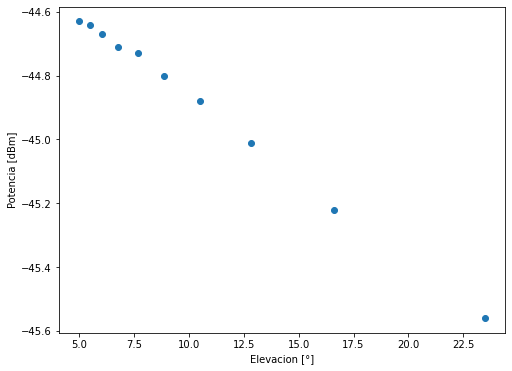

In [4]:
# datos extraidos del excel a un pandas
df=pd.read_excel('antdip.xlsx', sheet_name='Sheet1')

# grafiquemos los datos
plt.figure(figsize=(8, 6))
plt.plot(df['EL'], df['Psky'], 'o')
plt.xlabel('Elevacion [°]')
plt.ylabel('Potencia [dBm]')
plt.savefig('grafico raw data')
plt.show()


Notamos que la elevacion esta en angulos sexagesimales y la potencia en dBm, por lo que debemos convertirlas a Radianes y Watts respectivamente.

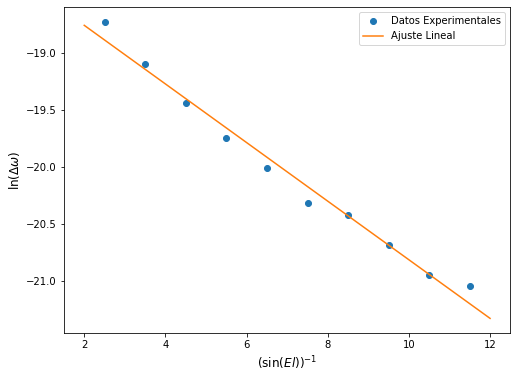

tau_0:  0.257350078618325


In [5]:
# potenccia del ambiente, cuando apunta al domo, en Watts
w_amb=PotenciaWatt(df['Psky'][10])

# potencia para diferentes elevaciones, en Watts
w_sky= PotenciaWatt(df['Psky'][:10])

# delta w
delta_w = w_amb-w_sky

# elevacion en radianes
El = np.radians(df['EL'][:10])

# vectores a graficar
X = 1/(np.sin(El))
Y = np.log(delta_w)

# fit lineal
z = np.polyfit(X, Y, 1) 
X_fit = np.linspace(2, 12 , 10)
Y_fit = z[0] * X_fit + z[1]

# grafico
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'o', label='Datos Experimentales')
plt.plot(X_fit, Y_fit, label='Ajuste Lineal')
plt.xlabel(r'$(\sin (El))^{-1}$', size=12)
plt.ylabel(r'$\ln (\Delta \omega)$', size=12)
plt.legend()
plt.show()

tau_w=z[0]

print('tau_0: ', -tau_w)


### Extraer espectros

Extraemos los datos desde los archivos de texto

In [6]:
# Se obtienen datos del espectro (velocidad y temperatura)
v11,T11 = np.genfromtxt('datos/sdf_111_111', unpack = True, skip_header=109)
v12,T12 = np.genfromtxt('datos/sdf_112_112', unpack = True, skip_header=109)
v13,T13 = np.genfromtxt('datos/sdf_113_113', unpack = True, skip_header=109)
v14,T14 = np.genfromtxt('datos/sdf_114_114', unpack = True, skip_header=109)
v15,T15 = np.genfromtxt('datos/sdf_115_115', unpack = True, skip_header=109)
v16,T16 = np.genfromtxt('datos/sdf_116_116', unpack = True, skip_header=109)
v17,T17 = np.genfromtxt('datos/sdf_117_117', unpack = True, skip_header=109)
v18,T18 = np.genfromtxt('datos/sdf_118_118', unpack = True, skip_header=109)
v19,T19 = np.genfromtxt('datos/sdf_119_119', unpack = True, skip_header=109)
v20,T20 = np.genfromtxt('datos/sdf_120_120', unpack = True, skip_header=109)
v21,T21 = np.genfromtxt('datos/sdf_121_121', unpack = True, skip_header=109)
v22,T22 = np.genfromtxt('datos/sdf_122_122', unpack = True, skip_header=109)
v23,T23 = np.genfromtxt('datos/sdf_123_123', unpack = True, skip_header=109)
v24,T24 = np.genfromtxt('datos/sdf_124_124', unpack = True, skip_header=109)
v25,T25 = np.genfromtxt('datos/sdf_125_125', unpack = True, skip_header=109)

Grafiquemos segun la posicion que corresponde, para cada medicion

In [7]:
#fiteo a gaussiana
# Se define funcion gaussiana a fitear
def f_gauss(x,T0,mean,stdv):
    return T0*np.exp(-((x-mean)**2)/(2*(stdv**2)))

# First Guess, luego de inspeccionar cada uno de los espectros
fg11 = [21, 10, 3] 
fg12 = [18,  9, 2] 
fg13 = [28, 10, 3] 
fg14 = [14,  9, 4] 
fg15 = [12, 10, 3] 

fg16 = [21, 10, 3] 
fg17 = [17,  9, 2] 
fg18 = [29, 10, 3] 
fg19 = [15,  9, 4] 
fg20 = [13, 10, 3.5]

fg21 = [20, 10, 3] 
fg22 = [20,  9, 2] 
fg23 = [30, 10, 3] 
fg24 = [12,  9, 4] 
fg25 = [13, 10, 3.5] 


# Se fitea
coefs11,cov11 = curve_fit(f_gauss, v11, T11, p0=fg11) 
coefs12,cov12 = curve_fit(f_gauss, v12, T12, p0=fg12)
coefs13,cov13 = curve_fit(f_gauss, v13, T13, p0=fg13)
coefs14,cov14 = curve_fit(f_gauss, v14, T14, p0=fg14)
coefs15,cov15 = curve_fit(f_gauss, v15, T15, p0=fg15)

coefs16,cov16 = curve_fit(f_gauss, v16, T16, p0=fg16)
coefs17,cov17 = curve_fit(f_gauss, v17, T17, p0=fg17)
coefs18,cov18 = curve_fit(f_gauss, v18, T18, p0=fg18)
coefs19,cov19 = curve_fit(f_gauss, v19, T19, p0=fg19)
coefs20,cov20 = curve_fit(f_gauss, v20, T20, p0=fg20)

coefs21,cov21 = curve_fit(f_gauss, v21, T21, p0=fg21)
coefs22,cov22 = curve_fit(f_gauss, v22, T22, p0=fg22)
coefs23,cov23 = curve_fit(f_gauss, v23, T23, p0=fg23)
coefs24,cov24 = curve_fit(f_gauss, v24, T24, p0=fg24)
coefs25,cov25 = curve_fit(f_gauss, v25, T25, p0=fg25)

Los coeficientes fiteaados (coefs) nos permitiran obtener t0,M,S para evaluar la funcion gaussiana

Text(0.04, 0.5, 'T [K]')

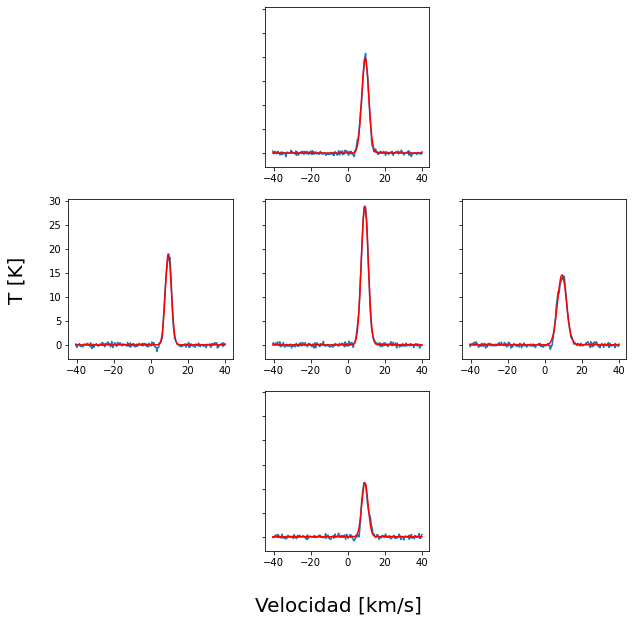

In [8]:
# medicion 1
fig, axs = plt.subplots(3, 3, sharey=True,  figsize=(10,10))
axs[0, 0].axis('off')
axs[0, 1].plot(v11, T11)
axs[0, 1].plot(v11, f_gauss(v11, coefs11[0], coefs11[1], coefs11[2]), 'r')
axs[0, 1].axis('auto')
axs[0, 2].axis('off')
axs[1, 0].plot(v12, T12)
axs[1, 0].plot(v12, f_gauss(v12, coefs12[0], coefs12[1], coefs12[2]), 'r')
axs[1, 1].plot(v13, T13)
axs[1, 1].plot(v13, f_gauss(v13, coefs13[0], coefs13[1], coefs13[2]), 'r')
axs[1, 2].plot(v14, T14)
axs[1, 2].plot(v14, f_gauss(v14, coefs14[0], coefs14[1], coefs14[2]), 'r')
axs[2, 0].axis('off')
axs[2, 1].plot(v15, T15)
axs[2, 1].plot(v15, f_gauss(v15, coefs15[0], coefs15[1], coefs15[2]), 'r')
axs[2, 2].axis('off')
fig.text(0.5, 0.04, 'Velocidad [km/s]', ha='center', size=20)
fig.text(0.04, 0.5, 'T [K]', va='center', rotation='vertical', size=20)

Text(0.04, 0.5, 'T [K]')

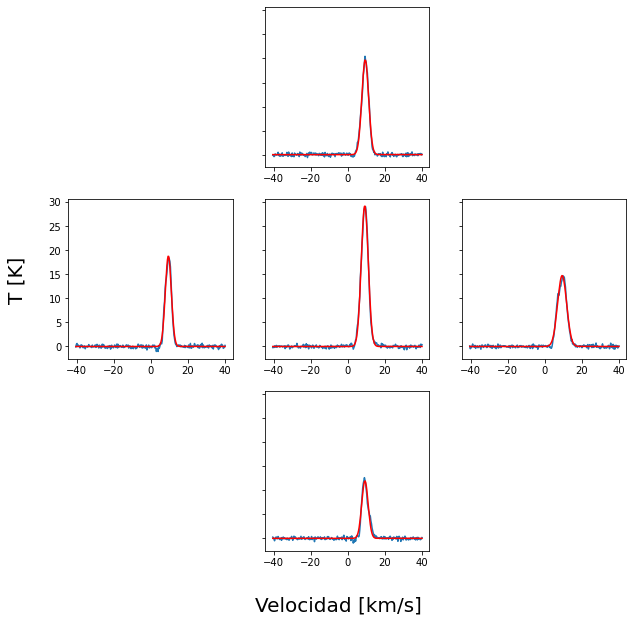

In [9]:
# medicion 2
fig, axs = plt.subplots(3, 3, sharey = True,figsize=(10,10))
axs[0, 0].axis('off')
axs[0, 1].plot(v16, T16)
axs[0, 1].plot(v16, f_gauss(v16, coefs16[0], coefs16[1], coefs16[2]), 'r')
axs[0, 2].axis('off')
axs[1, 0].plot(v17, T17)
axs[1, 0].plot(v17, f_gauss(v17, coefs17[0], coefs17[1], coefs17[2]), 'r')
axs[1, 1].plot(v18, T18)
axs[1, 1].plot(v18, f_gauss(v18, coefs18[0], coefs18[1], coefs18[2]), 'r')
axs[1, 2].plot(v19, T19)
axs[1, 2].plot(v19, f_gauss(v19, coefs19[0], coefs19[1], coefs19[2]), 'r')
axs[2, 0].axis('off')
axs[2, 1].plot(v20, T20)
axs[2, 1].plot(v20, f_gauss(v20, coefs20[0], coefs20[1], coefs20[2]), 'r')
axs[2, 2].axis('off')
fig.text(0.5, 0.04, 'Velocidad [km/s]', ha='center', size=20)
fig.text(0.04, 0.5, 'T [K]', va='center', rotation='vertical', size=20)

Text(0.04, 0.5, 'T [K]')

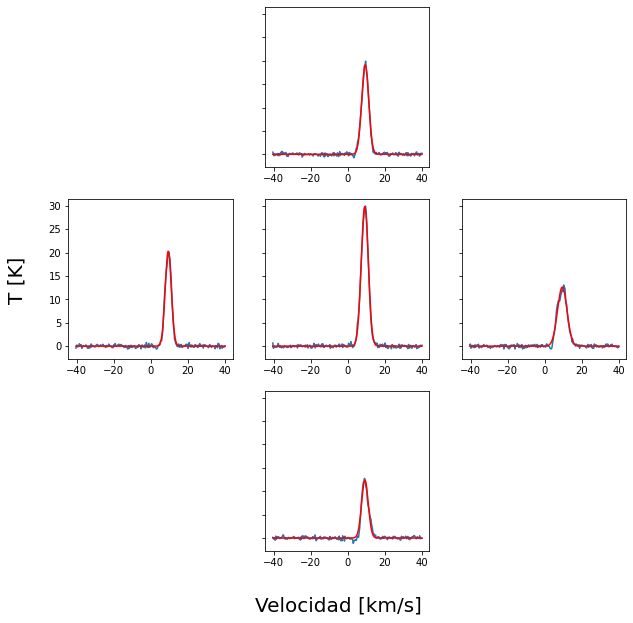

In [10]:
# medicion 3
fig, axs = plt.subplots(3, 3, sharey = True, figsize=(10,10))
axs[0, 0].axis('off')
axs[0, 1].plot(v21, T21)
axs[0, 1].plot(v21, f_gauss(v21, coefs21[0], coefs21[1], coefs21[2]), 'r')
axs[0, 2].axis('off')
axs[1, 0].plot(v22, T22)
axs[1, 0].plot(v22, f_gauss(v22, coefs22[0], coefs22[1], coefs22[2]), 'r')
axs[1, 1].plot(v23, T23)
axs[1, 1].plot(v23, f_gauss(v23, coefs23[0], coefs23[1], coefs23[2]), 'r')
axs[1, 2].plot(v24, T24)
axs[1, 2].plot(v24, f_gauss(v24, coefs24[0], coefs24[1], coefs24[2]), 'r')
axs[2, 0].axis('off')
axs[2, 1].plot(v25, T25)
axs[2, 1].plot(v25, f_gauss(v25, coefs25[0], coefs25[1], coefs25[2]), 'r')
axs[2, 2].axis('off')
fig.text(0.5, 0.04, 'Velocidad [km/s]', ha='center', size=20)
fig.text(0.04, 0.5, 'T [K]', va='center', rotation='vertical', size=20)

### Graficar T_{max} según coordenadas

Tomaremos los datos de la tercera medicion

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


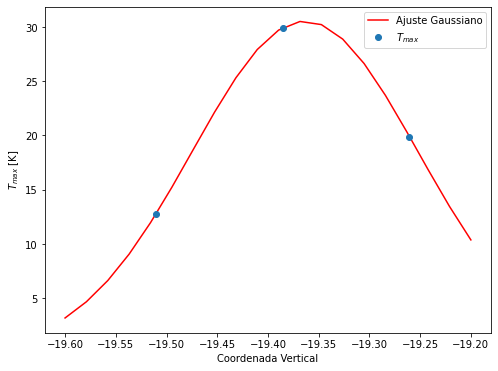

In [11]:
# horizontalmente
T_max21 = np.max(T21)
T_max23 = np.max(T23)
T_max25 = np.max(T25)

T_max = np.array([T_max21,T_max23,T_max25])

# extrayendo los datos del header para la coordenada vertical:
bii21 = -19.260527 
bii23 = -19.385527
bii25 = -19.510527 

bii = np.array([bii21,bii23,bii25])

# first guess
fgTmax = [T_max23, bii23, 0.2] 
# fit
coefsTmax,covTmax = curve_fit(f_gauss, bii, T_max, p0=fgTmax) 

#vector para graficar el ajuste
X=np.linspace(-19.6, -19.2, 20)

#grafico
plt.figure(figsize=(8, 6))
plt.plot( X, f_gauss(X, coefsTmax[0], coefsTmax[1], coefsTmax[2]), 'r', label='Ajuste Gaussiano')
plt.plot(bii, T_max, 'o', label=r'$T_{max}$')
plt.ylabel('$T_{max}$ [K]')
plt.xlabel('Coordenada Vertical')
plt.legend()
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


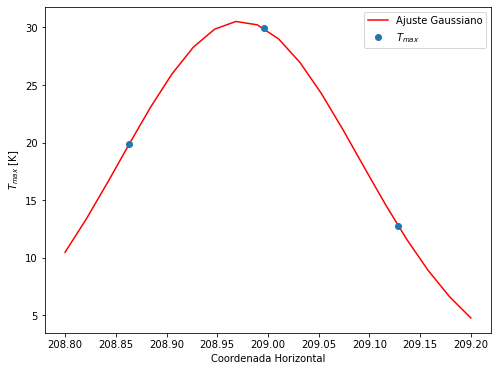

In [12]:
# verticalmente
T_max22 = np.max(T21)
T_max23 = np.max(T23)
T_max24 = np.max(T25)

T_max = np.array([T_max22,T_max23,T_max24])

# extrayendo los datos del header para la coordenada vertical:
lii22 = 208.863495 
lii23 = 208.996002 
lii24 = 209.128510 

lii = np.array([lii22,lii23,lii24])

# first guess
fgTmax = [T_max23, lii23, 0.2] 
# fit
coefsTmax,covTmax = curve_fit(f_gauss, lii, T_max, p0=fgTmax) 

#vector para graficar el ajuste
X=np.linspace(208.8, 209.2, 20)

#grafico
plt.figure(figsize=(8, 6))
plt.plot( X, f_gauss(X, coefsTmax[0], coefsTmax[1], coefsTmax[2]), 'r', label='Ajuste Gaussiano')
plt.plot(lii, T_max, 'o', label=r'$T_{max}$')
plt.ylabel('$T_{max}$ [K]')
plt.xlabel('Coordenada Horizontal')
plt.legend()
plt.show()


### Fitear Gaussiana a la temperatura integrada en las velocidades de cada espectro vs coordenadas

https://dsp.stackexchange.com/questions/8884/how-do-i-average-frequency-spectra

Mas informacion sobre numpy.fft:
https://numpy.org/doc/stable/reference/routines.fft.html

In [34]:
# para el espectro 1 veamos la transformada y promedios
esp_11 = fft.rfft(T11)
esp_16 = fft.rfft(T16)
esp_21 = fft.rfft(T21)
esp_11abs = np.abs(esp_11)**2
esp_16abs = np.abs(esp_16)**2
esp_21abs = np.abs(esp_21)**2
esp_int1 = (1/3) * (esp_11 +esp_16+ esp_21)

# espectro 2
esp_12 = fft.rfft(T12)
esp_17 = fft.rfft(T17)
esp_22 = fft.rfft(T22)
esp_12abs = np.abs(esp_12)**2
esp_17abs = np.abs(esp_17)**2
esp_22abs = np.abs(esp_22)**2
esp_int2 = (1/3) * (esp_12 +esp_17+ esp_22)

# espectro 3
esp_13 = fft.rfft(T13)
esp_18 = fft.rfft(T18)
esp_23 = fft.rfft(T23)
esp_13abs = np.abs(esp_13)**2
esp_18abs = np.abs(esp_18)**2
esp_23abs = np.abs(esp_23)**2
esp_int3 = (1/3) * (esp_13 +esp_18+ esp_23)

# espectro 4
esp_14 = fft.rfft(T14)
esp_19 = fft.rfft(T19)
esp_24 = fft.rfft(T24)
esp_14abs = np.abs(esp_14)**2
esp_19abs = np.abs(esp_19)**2
esp_24abs = np.abs(esp_24)**2
esp_int4 = (1/3) * (esp_14 +esp_19+ esp_24)

# espectro 5
esp_15 = fft.rfft(T15)
esp_20 = fft.rfft(T20)
esp_25 = fft.rfft(T25)
esp_15abs = np.abs(esp_15)**2
esp_20abs = np.abs(esp_20)**2
esp_25abs = np.abs(esp_25)**2
esp_int5 = (1/3) * (esp_15 +esp_20+ esp_22)

In [35]:
#obtenemos la temperatura integrada para cada espectro
Tint1 = np.fft.irfft(esp_int1, len(v11))
Tint2 = np.fft.irfft(esp_int2, len(v12))
Tint3 = np.fft.irfft(esp_int3, len(v13))
Tint4 = np.fft.irfft(esp_int4, len(v14))
Tint5 = np.fft.irfft(esp_int5, len(v15))

# fit gaussiano 
fgTint1 = [20, 10,   2] 
fgTint2 = [19, 10, 2.5] 
fgTint3 = [28,  9,   2] 
fgTint4 = [14, 10,   3] 
fgTint5 = [15, 10, 2.5] 


# Se fitea
coefsTint1, covTint1 = curve_fit(f_gauss, v11, Tint1, p0=fg11) 
coefsTint2, covTint2 = curve_fit(f_gauss, v12, Tint2, p0=fg12)
coefsTint3, covTint3 = curve_fit(f_gauss, v13, Tint3, p0=fg13)
coefsTint4, covTint4 = curve_fit(f_gauss, v14, Tint4, p0=fg14)
coefsTint5, covTint5 = curve_fit(f_gauss, v15, Tint5, p0=fg15)

Text(0.04, 0.5, 'T [K]')

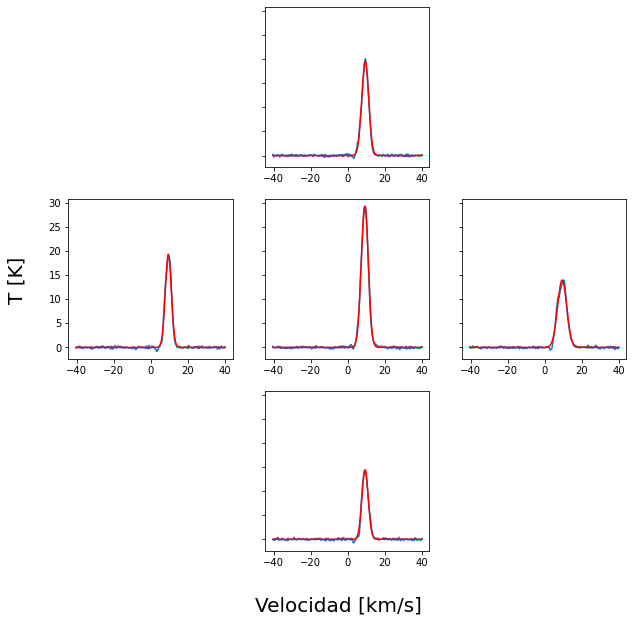

In [36]:
#graficamos
fig, axs = plt.subplots(3, 3, sharey = True, figsize=(10,10))
axs[0, 0].axis('off')
axs[0, 1].plot(v11, Tint1)
axs[0, 1].plot(v11, f_gauss(v11, coefsTint1[0], coefsTint1[1], coefsTint1[2]), 'r')
axs[0, 2].axis('off')
axs[1, 0].plot(v12, Tint2)
axs[1, 0].plot(v12, f_gauss(v12, coefsTint2[0], coefsTint2[1], coefsTint2[2]), 'r')
axs[1, 1].plot(v13, Tint3)
axs[1, 1].plot(v13, f_gauss(v13, coefsTint3[0], coefsTint3[1], coefsTint3[2]), 'r')
axs[1, 2].plot(v14, Tint4)
axs[1, 2].plot(v14, f_gauss(v14, coefsTint4[0], coefsTint4[1], coefsTint4[2]), 'r')
axs[2, 0].axis('off')
axs[2, 1].plot(v15, Tint5)
axs[2, 1].plot(v15, f_gauss(v15, coefsTint5[0], coefsTint5[1], coefsTint5[2]), 'r')
axs[2, 2].axis('off')
fig.text(0.5, 0.04, 'Velocidad [km/s]', ha='center', size=20)
fig.text(0.04, 0.5, 'T [K]', va='center', rotation='vertical', size=20)

### Error Promedio 

In [37]:
# pongamos los datos en un pandas

#integrados
pdint1 = pd.DataFrame()

pdint1['V'] = v11
pdint1['T'] = Tint1

# con 1 medicion
pd1 = pd.DataFrame()

pd1['V'] = v11
pd1['T'] = T11

In [38]:
# seleccionamos lo que sea ruido, osea lo que esta mas alla de 3*s de la media, hacia arriba y hacia abajo
# integrado 3 mediciones
pdint1men = pdint1[pdint1['V'] < coefsTint1[1]-5*coefsTint1[2]]
pdint1mas = pdint1[pdint1['V'] > coefs11[1]+5*coefs11[2]]

# 1 medicion
pd1men = pd1[pd1['V'] < coefs11[1]-5*coefs11[2]]
pd1mas = pd1[pd1['V'] > coefs11[1]+5*coefs11[2]]

In [39]:
# RMS
def RMS(pdmen,pdmas):
    pdmensq = pdmen['T']**2
    pdmassq = pdmas['T']**2
    suma = (1/(len(pdmen)+len(pdmas)))*(pdmensq.sum()+pdmassq.sum())
    return np.sqrt(suma)

RMSint1 = RMS(pdint1men,pdint1mas)
RMS1    = RMS(pd1men,pd1mas)

print(RMSint1/RMS1)

0.5658746786709634


Veamos con 2 observaciones:

In [31]:
esp_int1 = (1/2) * (esp_11 +esp_16)
Tint1 = np.fft.irfft(esp_int1, len(v11))
pdint1 = pd.DataFrame()
pdint1['V'] = v11
pdint1['T'] = Tint1
pdint1men = pdint1[pdint1['V'] < coefsTint1[1]-5*coefsTint1[2]]
pdint1mas = pdint1[pdint1['V'] > coefs11[1]+5*coefs11[2]]

In [32]:
RMSint2 = RMS(pdint1men,pdint1mas)

print(RMSint2)

0.1796859895677422


Se Cumple!